In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('IMDB_Top250_Cleaned.csv')

In [3]:
df.head()

,Name,Genre,Year,Duration,Average_Rating,Num_of_Rating(in K)
0,The Shawshank Redemption,Drama,1994,2.22,9.3,3100
1,The Godfather,Drama,1972,2.55,9.2,2200
2,The Dark Knight,Thriller,2008,2.32,9.1,3100
3,The Godfather Part II,Drama,1974,3.22,9.0,1400
4,12 Angry Men,Drama,1957,1.36,9.0,946


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 250 non-null    object 
 1   Genre                250 non-null    object 
 2   Year                 250 non-null    int64  
 3   Duration             250 non-null    float64
 4   Average_Rating       250 non-null    float64
 5   Num_of_Rating(in K)  250 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 11.8+ KB


In [5]:
# Created a New column 

bins = [1920,1940,1960,1980,2000,2040]
labels = ['1920-1940','1940-1960','1960-1980','1980-2000','2000-Onwards']

df['Year_Bins'] = pd.cut(df['Year'],bins=bins, labels=labels)

In [6]:
# Decription of Numerical Columns

df.describe()

,Year,Duration,Average_Rating,Num_of_Rating(in K)
count,250.000000,250.000000,250.000000,250.000000
mean,1988.532000,2.013800,8.308400,740.964000
std,25.375592,0.707703,0.232088,599.982432
min,1921.000000,0.200000,8.000000,26.000000
25%,1973.000000,1.470000,8.100000,245.500000
50%,1995.000000,2.130000,8.200000,623.500000
75%,2009.000000,2.395000,8.400000,1100.000000
max,2024.000000,6.140000,9.300000,3100.000000


In [7]:
# Decription of Categorical Columns

df.describe(include='object')

,Name,Genre
count,250,250
unique,250,24
top,The Shawshank Redemption,Drama
freq,1,56


# EDA

### Boxplot and Histogram 

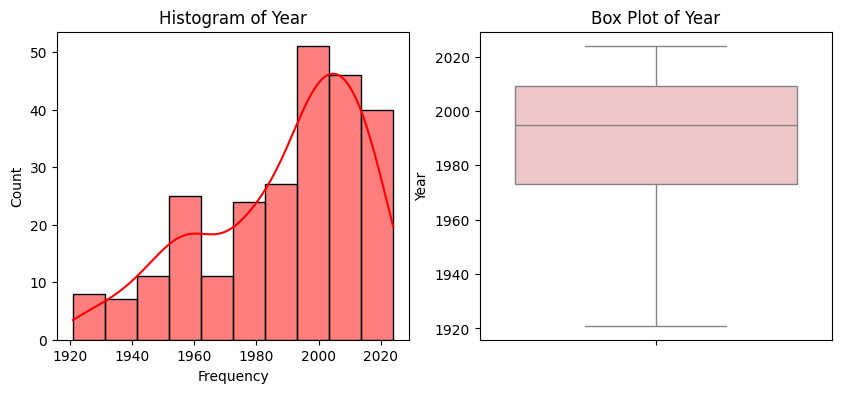

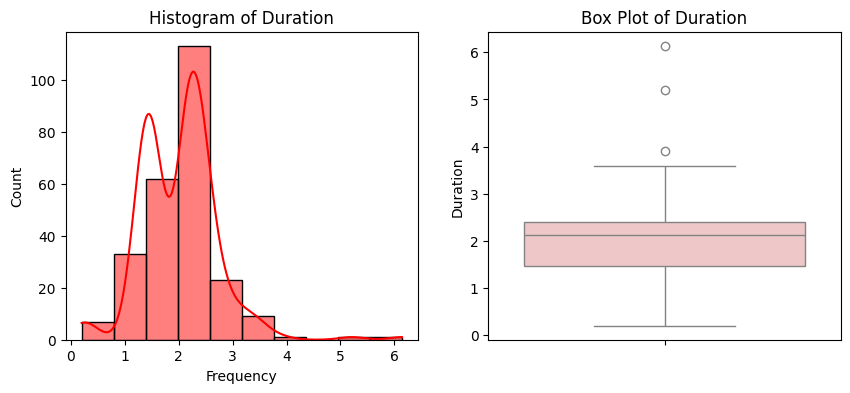

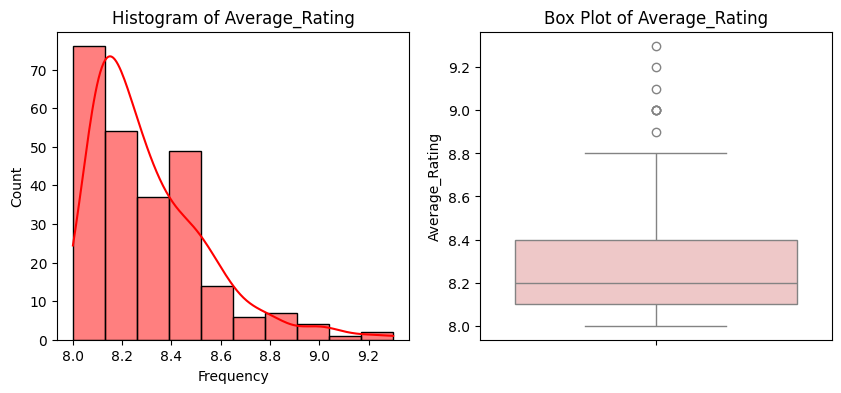

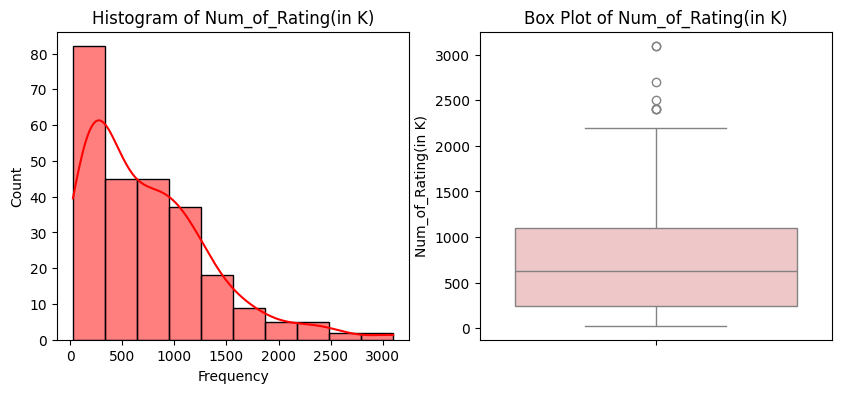

In [33]:
for col in df.select_dtypes(include = 'number'):
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col],bins = 10,kde =True,color='red')
    plt.title(f'Histogram of {col}')
    plt.xlabel('Frequency')

    plt.subplot(1,2,2)
    sns.boxplot(df[col],color='#F4C2C2')
    plt.title(f'Box Plot of {col}')
    plt.show()

### Pairplot

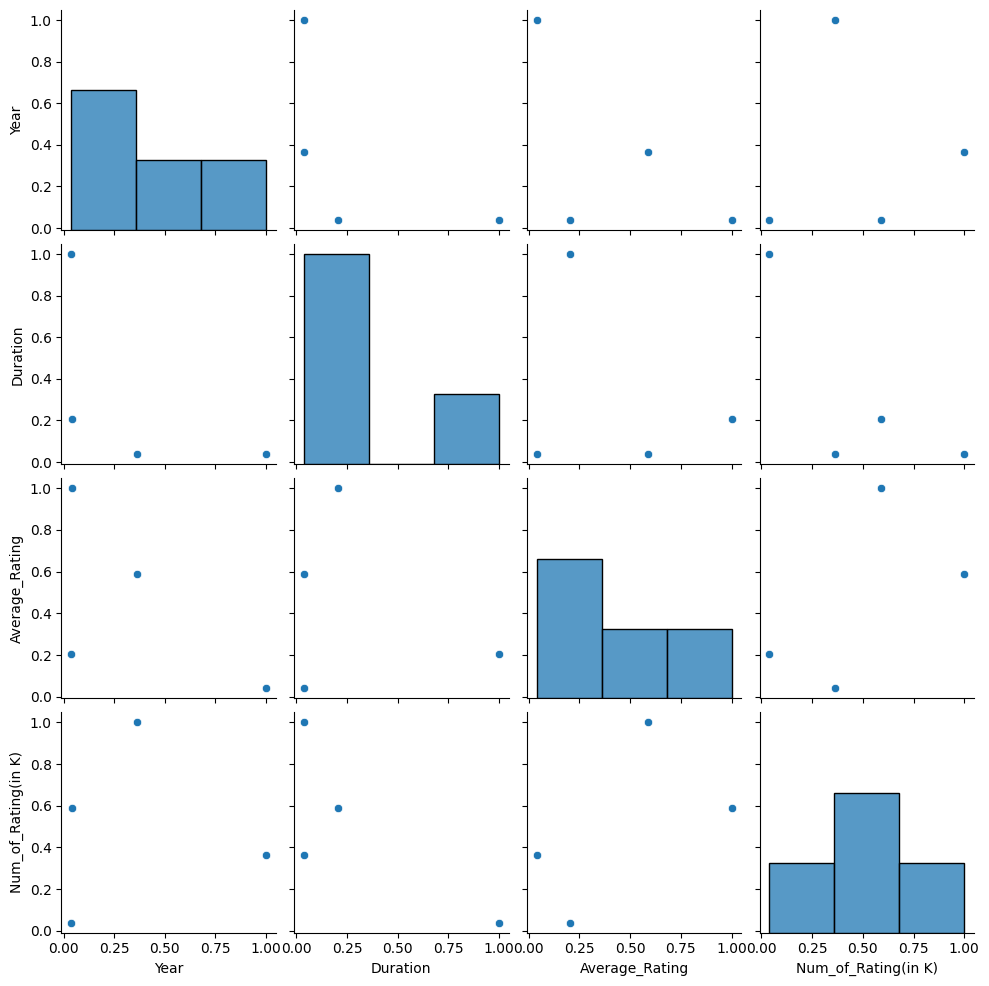

In [47]:
sns.pairplot(df.corr(numeric_only=True))
plt.show()

### Correlation Matrix

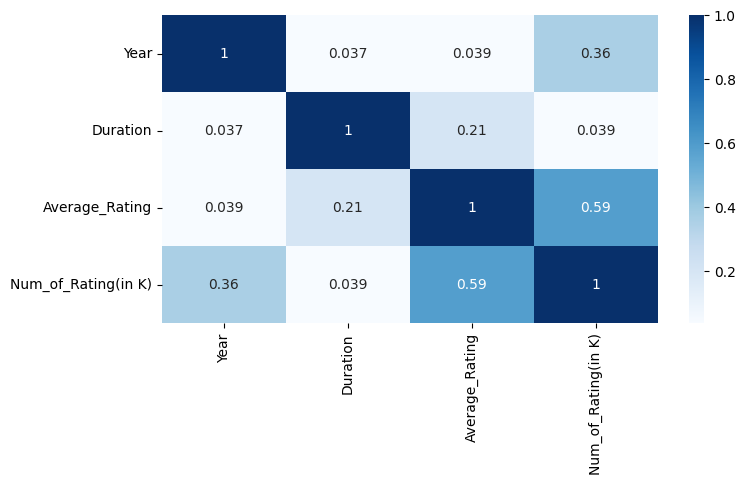

In [10]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True),annot  =True,cmap='Blues')
plt.show()

### Top Movies

In [11]:
rating_wise = df.sort_values('Average_Rating',ascending=False).head()
rating_wise

,Name,Genre,Year,Duration,Average_Rating,Num_of_Rating(in K),Year_Bins
0,The Shawshank Redemption,Drama,1994,2.22,9.3,3100,1980-2000
1,The Godfather,Drama,1972,2.55,9.2,2200,1960-1980
2,The Dark Knight,Thriller,2008,2.32,9.1,3100,2000-Onwards
3,The Godfather Part II,Drama,1974,3.22,9.0,1400,1960-1980
4,12 Angry Men,Drama,1957,1.36,9.0,946,1940-1960


In [12]:
num_of_rating = df.sort_values('Num_of_Rating(in K)',ascending=False).head()
num_of_rating

,Name,Genre,Year,Duration,Average_Rating,Num_of_Rating(in K),Year_Bins
0,The Shawshank Redemption,Drama,1994,2.22,9.3,3100,1980-2000
2,The Dark Knight,Thriller,2008,2.32,9.1,3100,2000-Onwards
13,Inception,Thriller,2010,2.28,8.8,2700,2000-Onwards
12,Fight Club,Thriller,1999,2.19,8.8,2500,1980-2000
7,Pulp Fiction,Drama,1994,2.34,8.8,2400,1980-2000


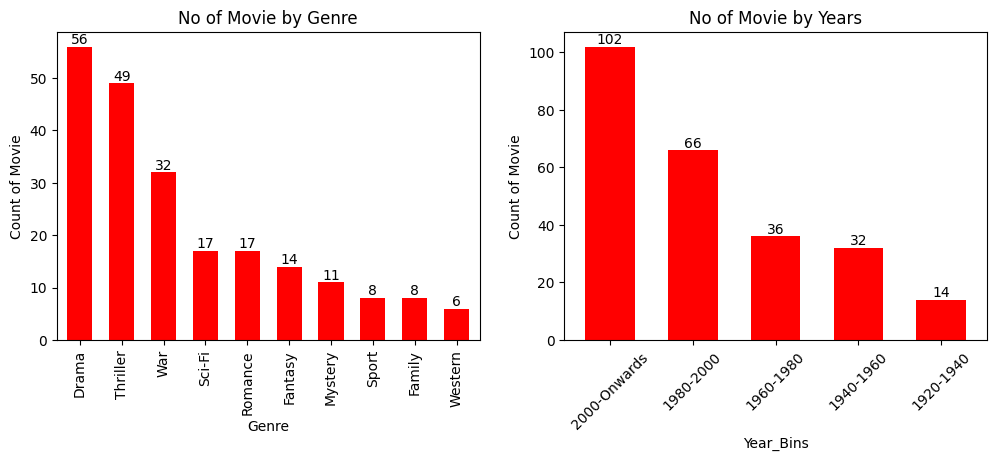

In [40]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
ax = df['Genre'].value_counts().head(10).plot(kind = 'bar',width=0.6,color = 'red')
ax.bar_label(ax.containers[0])
plt.ylabel('Count of Movie')
plt.title('No of Movie by Genre')


plt.subplot(1,2,2)
ax1 = df['Year_Bins'].value_counts().head(10).plot(kind = 'bar',width=0.6, color = 'red')
ax1.bar_label(ax1.containers[0])
plt.xticks(rotation = 45)
plt.ylabel('Count of Movie')
plt.title('No of Movie by Years')
plt.show()

In [14]:
genre_wise = round(df.groupby('Genre')[['Duration','Average_Rating']].mean(),2)

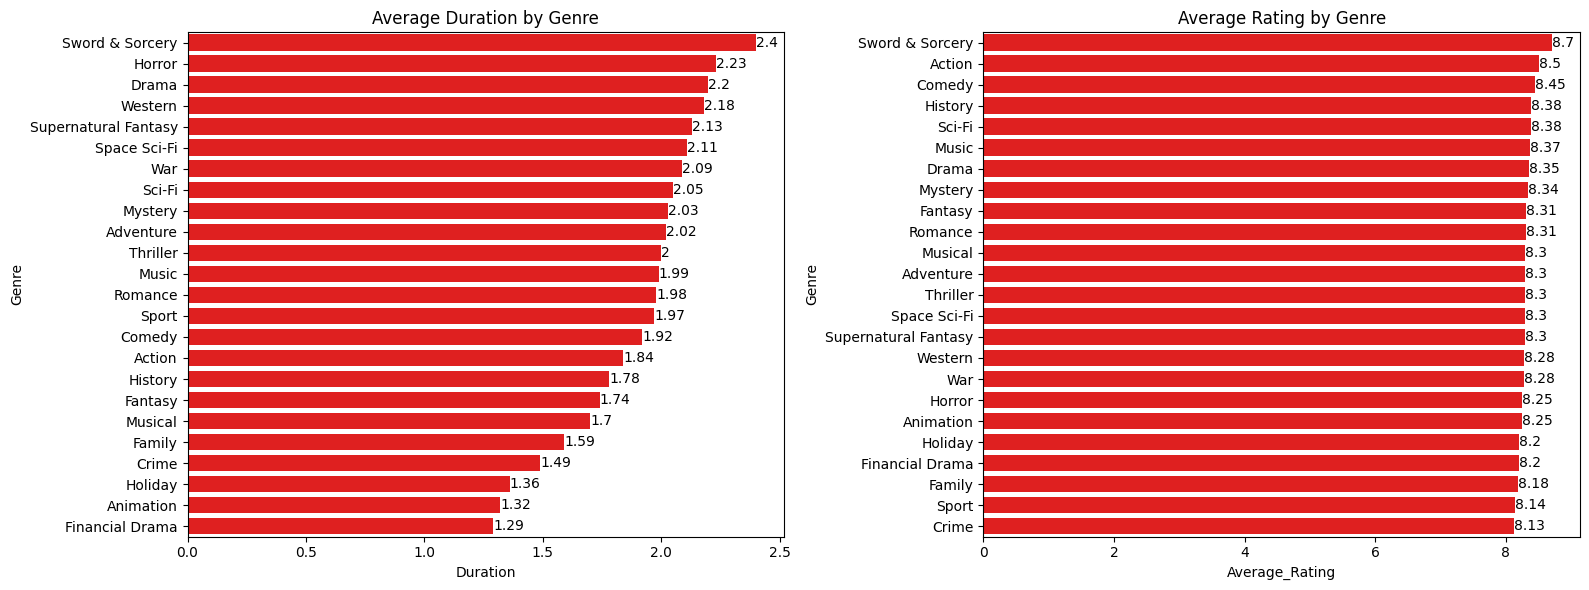

In [41]:
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
ax = sns.barplot(y = 'Genre',x = 'Duration',data = genre_wise.sort_values('Duration',ascending = False),color='red')
ax.bar_label(ax.containers[0])
plt.title('Average Duration by Genre')

plt.subplot(1,2,2)
ax2 = sns.barplot(y = 'Genre',x = 'Average_Rating',data = genre_wise.sort_values('Average_Rating',ascending = False),color = 'red')
ax2.bar_label(ax2.containers[0])
plt.title('Average Rating by Genre')
plt.tight_layout()
plt.show()

In [19]:
num_rating_genre = round((df.groupby('Genre')['Num_of_Rating(in K)'].sum())/1000,2).sort_values(ascending = False).reset_index()

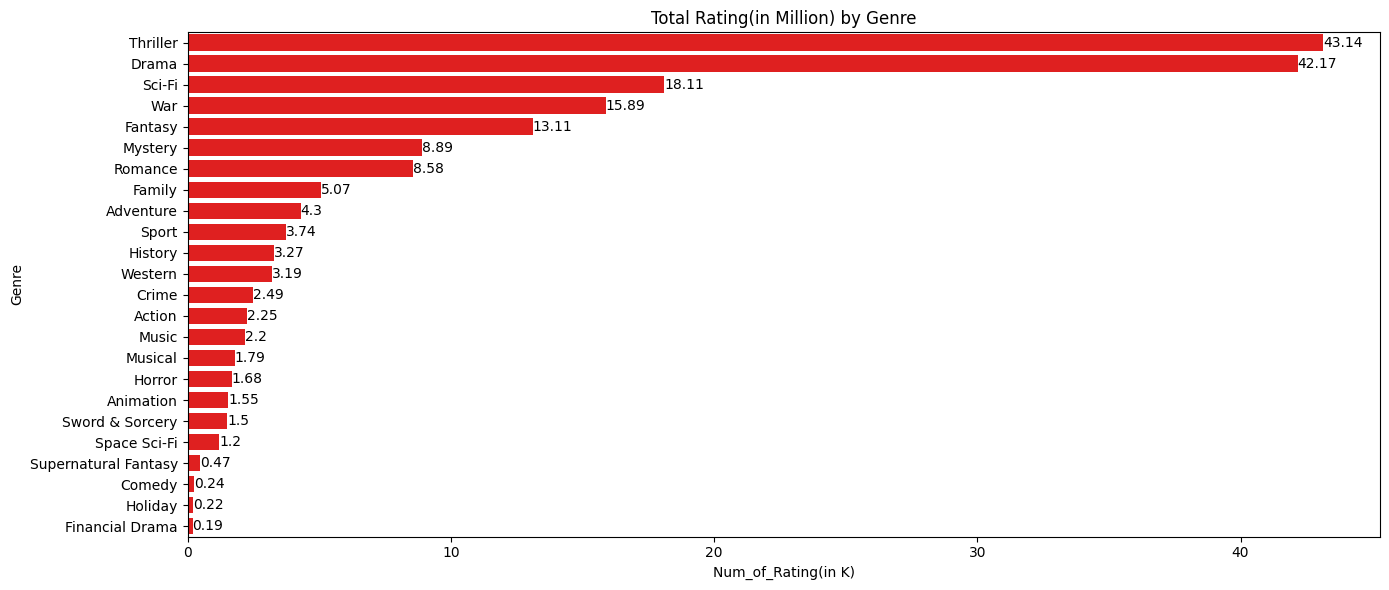

In [42]:
plt.figure(figsize = (14,6))
ax3 = sns.barplot(y = 'Genre',x = 'Num_of_Rating(in K)',data = num_rating_genre, color='red')
ax3.bar_label(ax3.containers[0])
plt.title('Total Rating(in Million) by Genre')
plt.tight_layout()
plt.show()

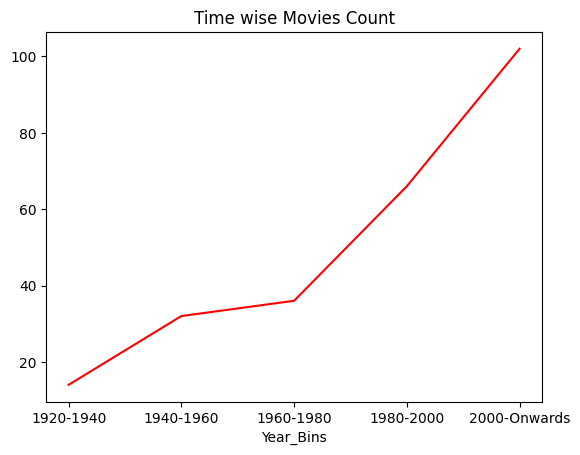

In [44]:
sns.lineplot(x=df['Year_Bins'].value_counts().index,y = df['Year_Bins'].value_counts().values,color='red')
plt.title('Time wise Movies Count')
plt.show()

### Top Movie from each Category

In [83]:
category = pd.DataFrame(columns=df.columns)
genre_list = df['Genre'].unique().tolist()
n = 0
for i in genre_list:
    emp = df[df['Genre'] == i].sort_values(by = 'Average_Rating',ascending = False).head(1).to_numpy().tolist()[0]
    category.loc[n,:] = emp
    n = n + 1

In [84]:
category

,Name,Genre,Year,Duration,Average_Rating,Num_of_Rating(in K),Year_Bins
0,The Shawshank Redemption,Drama,1994,2.22,9.3,3100,1980-2000
1,The Dark Knight,Thriller,2008,2.32,9.1,3100,2000-Onwards
2,Schindler's List,History,1993,3.15,9.0,1500,1980-2000
3,The Lord of the Rings: The Fellowship of the Ring,Fantasy,2001,2.58,8.9,2100,2000-Onwards
4,"The Good, the Bad and the Ugly",Adventure,1966,2.58,8.8,866,1960-1980
5,Forrest Gump,Romance,1994,2.22,8.8,2400,1980-2000
6,Star Wars: Episode V - The Empire Strikes Back,Sword & Sorcery,1980,2.4,8.7,1500,1960-1980
7,The Matrix,Sci-Fi,1999,2.16,8.7,2200,1980-2000
8,Se7en,Mystery,1995,2.7,8.6,1900,1980-2000
9,Saving Private Ryan,War,1998,2.49,8.6,1600,1980-2000
